In [1]:
%matplotlib inline

In [2]:
import model_time_range as mtr
from scipy.io import readsav
from fancy_plot import fancy_plot
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import pandas as pd



In [3]:
#Wind to get DTW solution
window = pd.to_timedelta(1.*3600.,unit='s')



#Setup format for datetime string to pass to my_dtw later
dfmt = '{0:%Y/%m/%d %H:%M:%S}'

#twind = pd.to_datetime('2016/12/20 15:38:38')    
#twind = pd.to_datetime('2016/12/21 08:43:12')    
#twind = pd.to_datetime('2016/07/28 13:25:21')    
#twind = pd.to_datetime('2017/07/01 16:55:03')    
#twind = pd.to_datetime('2016/10/12 21:16:14')    
#twind = pd.to_datetime('2016/12/09 04:45:29')    
#twind = pd.to_datetime('2016/12/21 08:43:12')    

twinds = [
          pd.to_datetime('2016/10/12 21:16:14')
          ]




['../cdf//ace/plsm/ac_h0_swe_20161012_v10.cdf', '../cdf//ace/plsm/ac_h0_swe_20161013_v10.cdf']
['../cdf//ace/mag/ac_h0_mfi_20161012_v06.cdf', '../cdf//ace/mag/ac_h0_mfi_20161013_v06.cdf']
['../cdf//dscovr/plsm/dscovr_h1_fc_20161012_v06.cdf', '../cdf//dscovr/plsm/dscovr_h1_fc_20161013_v06.cdf']
['../cdf//ace/orb/ac_or_ssc_20160101_v01.cdf']
['../cdf//dscovr/mag/dscovr_h0_mag_20161012_v01.cdf', '../cdf//dscovr/mag/dscovr_h0_mag_20161013_v01.cdf']
['../cdf//wind/plsm/wi_h1_swe_20161012_v01.cdf', '../cdf//wind/plsm/wi_h1_swe_20161013_v01.cdf']
['../cdf//dscovr/orb/dscovr_orbit_pre_20161012_v04.cdf', '../cdf//dscovr/orb/dscovr_orbit_pre_20161013_v04.cdf']
['../cdf//wind/mag/wi_h2_mfi_20161012_v05.cdf', '../cdf//wind/mag/wi_h2_mfi_20161013_v05.cdf']
['../cdf//wind/orb/wi_or_pre_20161012_v02.cdf', '../cdf//wind/orb/wi_or_pre_20161013_v02.cdf']


load_cdf_files.py:214: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:208: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:215: RuntimeWarning: invalid value encountered in sqrt
  Vth   = 1.E-3*np.sqrt(2.*kb/mp*cdf[keys[3]][...]) #convert Thermal Temp to Speed
model_time_range.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pls['time_dt_pls'] = pd.to_datetime(pls['Time'])
model_time_range.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

###########################################
DSCOVR
WARPING TIME
Penalty = 10.000
STOP WARPING TIME
REINDEXED
###########################################
###########################################
ACE
WARPING TIME
Penalty = 10.000
STOP WARPING TIME
REINDEXED
###########################################
###########################################
SOHO
WARPING TIME
Penalty = 10.000
STOP WARPING TIME
REINDEXED
###########################################


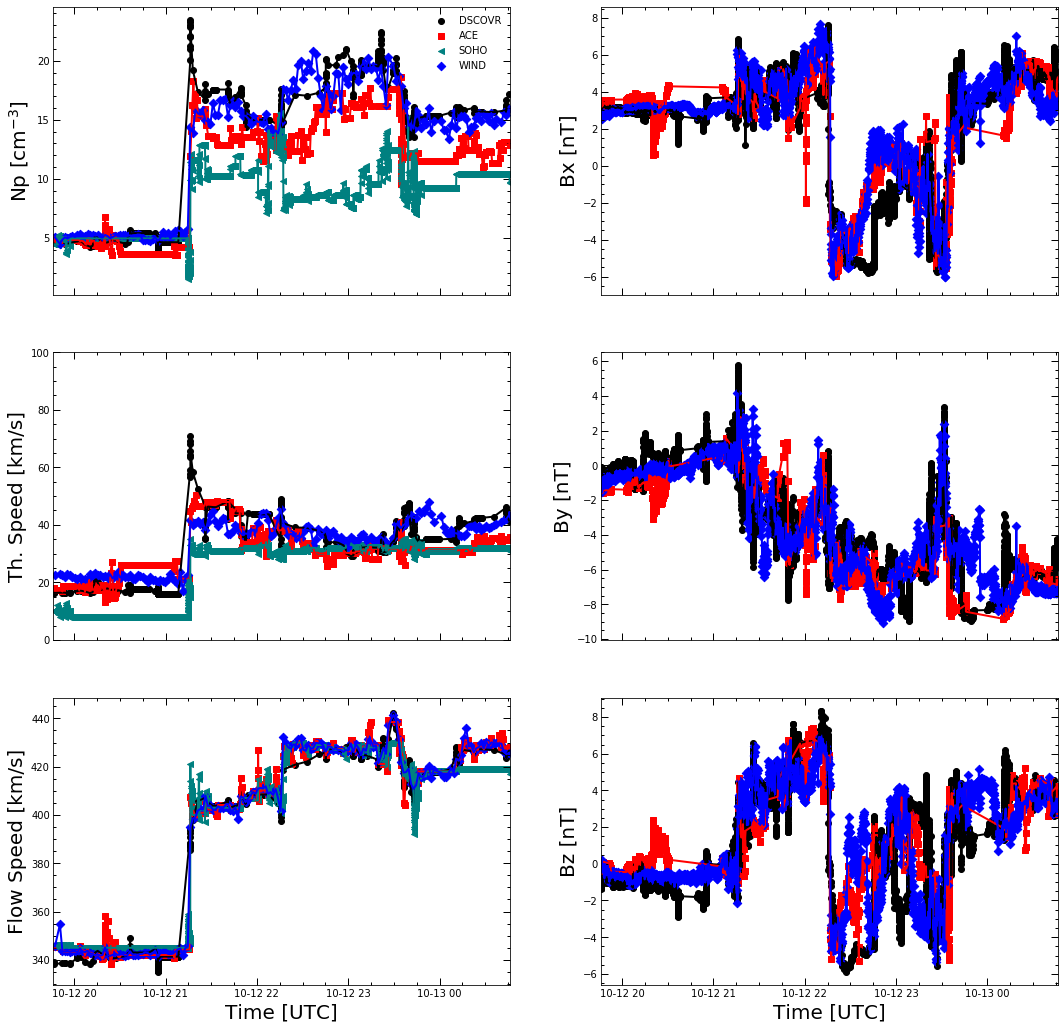

In [24]:
for twind in twinds:

    start_t = dfmt.format(twind-1.5*window)
    #For the 2016/12/21 event
    end_t = dfmt.format(twind+3.5*window)
    #'2016/10/12 21:16:14
    #my_dtw = mtr.dtw_plane(start_t,end_t,nproc=4,earth_craft=['THEMIS_B','THEMIS_C'],penalty=True,events=3)
    my_dtw = mtr.dtw_plane(start_t,end_t,nproc=4,penalty=True,mag_pen=.15,par=['SPEED'])
    my_dtw.init_read()  
    #Do not use multi parm Single parameter solution works better
    my_dtw.dtw()
    my_dtw.fig.savefig('../plots/bou_{0:%Y%m%d_%H%M%S}.png'.format(pd.to_datetime(twind)),bbox_pad=.1,bbox_inches='tight')


['../cdf//ace/plsm/ac_h0_swe_20161012_v10.cdf', '../cdf//ace/plsm/ac_h0_swe_20161013_v10.cdf']
['../cdf//ace/mag/ac_h0_mfi_20161012_v06.cdf', '../cdf//ace/mag/ac_h0_mfi_20161013_v06.cdf']
['../cdf//dscovr/plsm/dscovr_h1_fc_20161012_v06.cdf', '../cdf//dscovr/plsm/dscovr_h1_fc_20161013_v06.cdf']
['../cdf//dscovr/mag/dscovr_h0_mag_20161012_v01.cdf', '../cdf//dscovr/mag/dscovr_h0_mag_20161013_v01.cdf']
['../cdf//ace/orb/ac_or_ssc_20160101_v01.cdf']
['../cdf//dscovr/orb/dscovr_orbit_pre_20161012_v04.cdf', '../cdf//dscovr/orb/dscovr_orbit_pre_20161013_v04.cdf']
['../cdf//wind/plsm/wi_h1_swe_20161012_v01.cdf', '../cdf//wind/plsm/wi_h1_swe_20161013_v01.cdf']
['../cdf//wind/mag/wi_h2_mfi_20161012_v05.cdf', '../cdf//wind/mag/wi_h2_mfi_20161013_v05.cdf']
['../cdf//wind/orb/wi_or_pre_20161012_v02.cdf', '../cdf//wind/orb/wi_or_pre_20161013_v02.cdf']


load_cdf_files.py:214: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:208: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:215: RuntimeWarning: invalid value encountered in sqrt
  Vth   = 1.E-3*np.sqrt(2.*kb/mp*cdf[keys[3]][...]) #convert Thermal Temp to Speed
model_time_range.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pls['time_dt_pls'] = pd.to_datetime(pls['Time'])
model_time_range.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

###########################################
DSCOVR
WARPING TIME
Penalty = 100.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
ACE
WARPING TIME
Penalty = 100.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
SOHO
WARPING TIME
Penalty = 5.000
STOP WARPING TIME
REINDEXED
###########################################


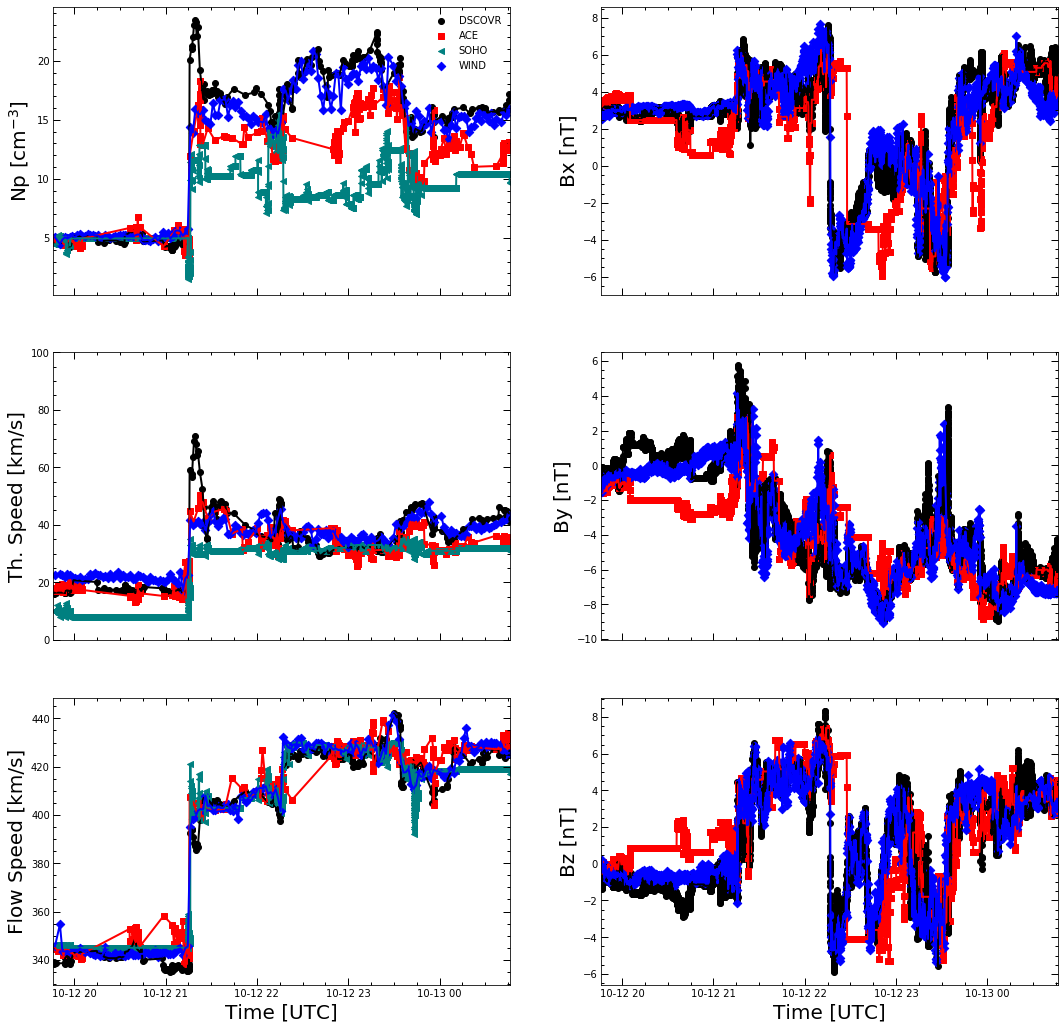

In [25]:
my_dtw = mtr.dtw_plane(start_t,end_t,nproc=4,penalty=True,mag_pen=100.2,speed_pen=5,par=['Bt'])
my_dtw.init_read()
#Do not use multi parm Single parameter solution works better
my_dtw.dtw()

###########################################
DSCOVR
WARPING TIME
Penalty = 100.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
ACE
WARPING TIME
Penalty = 100.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
SOHO
WARPING TIME
Penalty = 5.000
STOP WARPING TIME
REINDEXED
###########################################


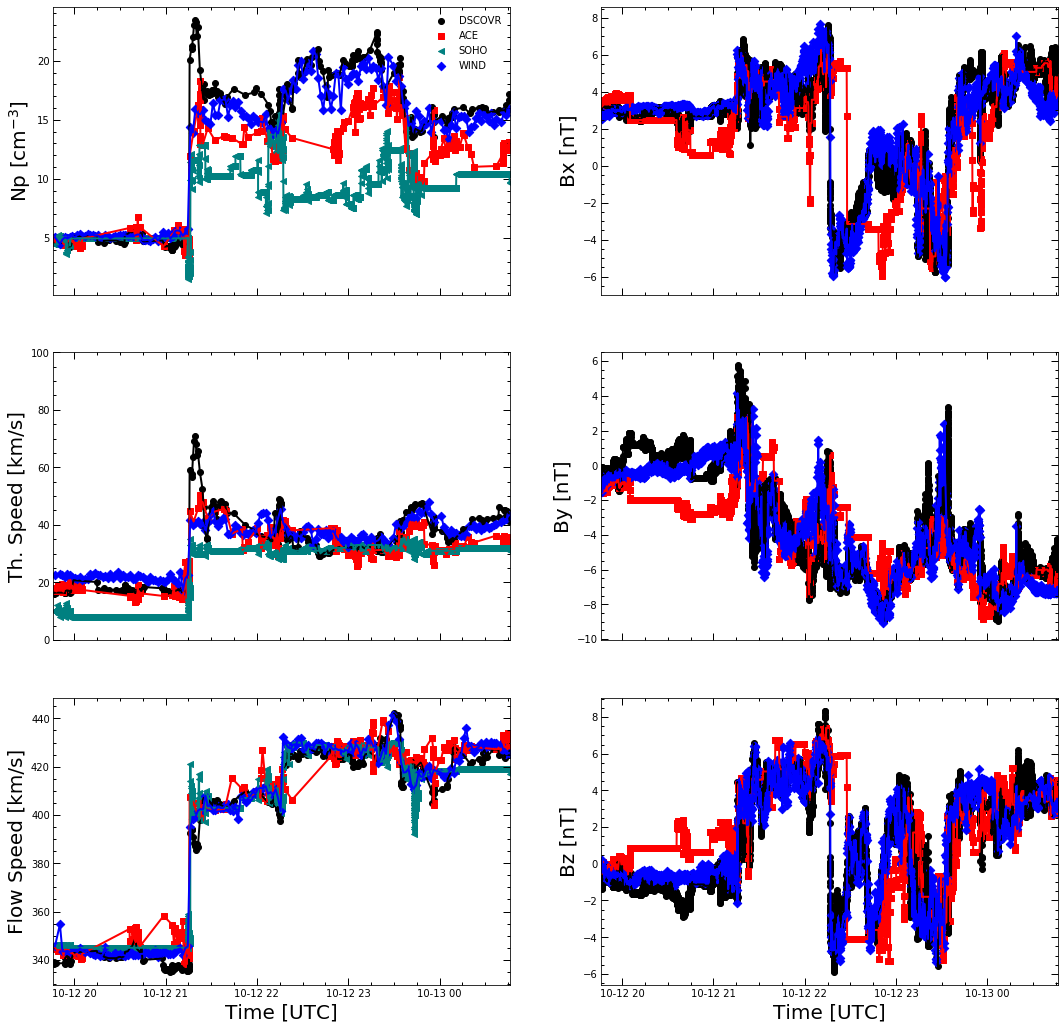

In [26]:
#change fitting parameter
#my_dtw.parm = ['Bt']
#my_dtw.dtw()

In [5]:
twind1 = pd.to_datetime('2016/12/21 08:43:12')

In [8]:
start_t1 = dfmt.format(twind1-2.5*window)
#For the 2016/12/21 event
end_t1 = dfmt.format(twind1+3.5*window)

['../cdf//ace/plsm/ac_h0_swe_20161221_v10.cdf']
['../cdf//dscovr/plsm/dscovr_h1_fc_20161221_v06.cdf']
['../cdf//ace/mag/ac_h0_mfi_20161221_v06.cdf']
['../cdf//dscovr/mag/dscovr_h0_mag_20161221_v01.cdf']
['../cdf//ace/orb/ac_or_ssc_20160101_v01.cdf']
['../cdf//wind/plsm/wi_h1_swe_20161221_v01.cdf']
['../cdf//dscovr/orb/dscovr_orbit_pre_20161221_v07.cdf']
['../cdf//wind/mag/wi_h2_mfi_20161221_v05.cdf']
['../cdf//wind/orb/wi_or_pre_20161221_v02.cdf']


load_cdf_files.py:208: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:214: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:215: RuntimeWarning: invalid value encountered in sqrt
  Vth   = 1.E-3*np.sqrt(2.*kb/mp*cdf[keys[3]][...]) #convert Thermal Temp to Speed
model_time_range.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pls['time_dt_pls'] = pd.to_datetime(pls['Time'])
model_time_range.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

###########################################
DSCOVR
WARPING TIME
Penalty = 0.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
ACE
WARPING TIME
Penalty = 0.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
SOHO
WARPING TIME
Penalty = 10.000
STOP WARPING TIME
REINDEXED
###########################################


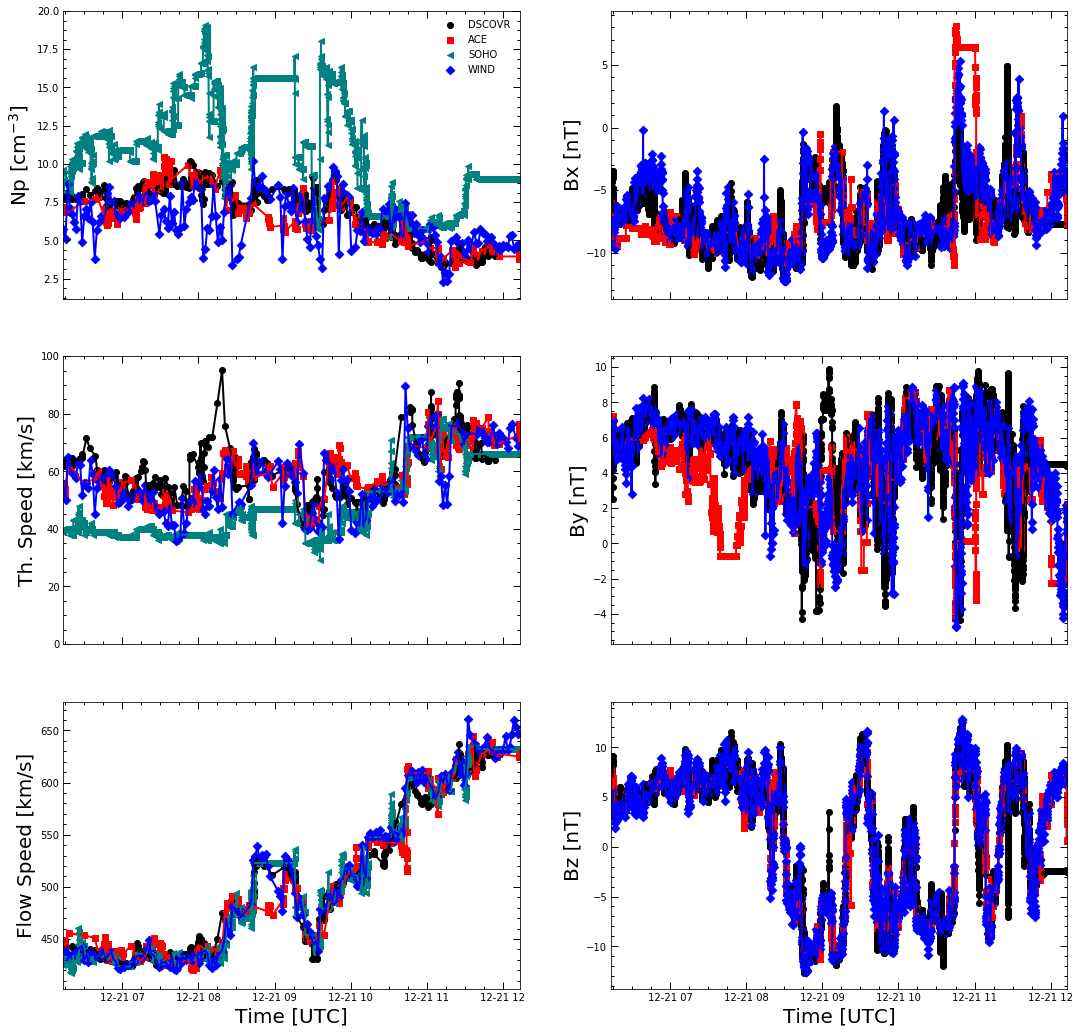

In [9]:
my_dtw1 = mtr.dtw_plane(start_t1,end_t1,nproc=4,penalty=True,events=7)
my_dtw1.init_read()
#Do not use multi parm Single parameter solution works better
my_dtw1.dtw()

In [13]:
my_dtw1.fig.savefig('../plots/bou_{0:%Y%m%d_%H%M%S}.eps'.format(pd.to_datetime(twind1)),bbox_pad=.1,bbox_inches='tight')

['../cdf//ace/plsm/ac_h0_swe_20161221_v10.cdf']
['../cdf//dscovr/plsm/dscovr_h1_fc_20161221_v06.cdf']
['../cdf//ace/mag/ac_h0_mfi_20161221_v06.cdf']
['../cdf//dscovr/mag/dscovr_h0_mag_20161221_v01.cdf']
['../cdf//ace/orb/ac_or_ssc_20160101_v01.cdf']
['../cdf//wind/plsm/wi_h1_swe_20161221_v01.cdf']
['../cdf//dscovr/orb/dscovr_orbit_pre_20161221_v07.cdf']
['../cdf//wind/mag/wi_h2_mfi_20161221_v05.cdf']
['../cdf//wind/orb/wi_or_pre_20161221_v02.cdf']


load_cdf_files.py:214: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:208: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:215: RuntimeWarning: invalid value encountered in sqrt
  Vth   = 1.E-3*np.sqrt(2.*kb/mp*cdf[keys[3]][...]) #convert Thermal Temp to Speed
model_time_range.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pls['time_dt_pls'] = pd.to_datetime(pls['Time'])
model_time_range.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

['../cdf//themis_b/plsm/thb_l2_mom_20161221_v01.cdf']
['../cdf//themis_b/plsm/thb_l2_mom_20161221_v01.cdf']
['../cdf//themis_b/orb/thb_or_ssc_20161201_v01.cdf']
###########################################
DSCOVR
WARPING TIME
Penalty = 100.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
ACE
WARPING TIME
Penalty = 100.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
SOHO
WARPING TIME
Penalty = 500.000
STOP WARPING TIME
REINDEXED
###########################################
###########################################
THEMIS_B
WARPING TIME
Penalty = 500.000
STOP WARPING TIME
REINDEXED
###########################################


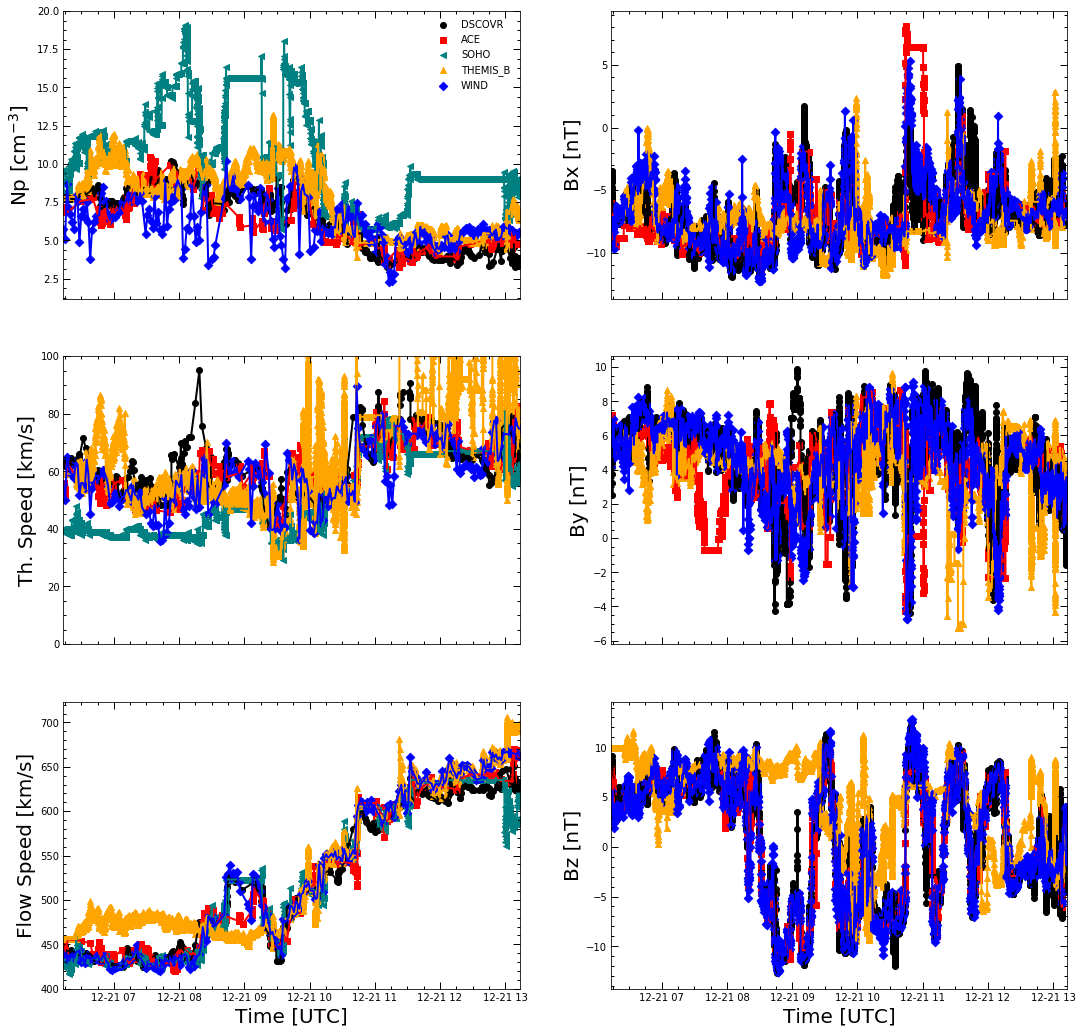

In [89]:
#Added 45 minute padding rejection
reload(mtr)
start_t1 = dfmt.format(twind1-2.5*window)
#For the 2016/12/21 event
end_t1 = dfmt.format(twind1+4.5*window)
my_dtw1 = mtr.dtw_plane(start_t1,end_t1,nproc=4,penalty=True,events=7,earth_craft=['THEMIS_B'],mag_pen=100.2,speed_pen=500)
my_dtw1.init_read()
#Do not use multi parm Single parameter solution works better
my_dtw1.dtw()

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F

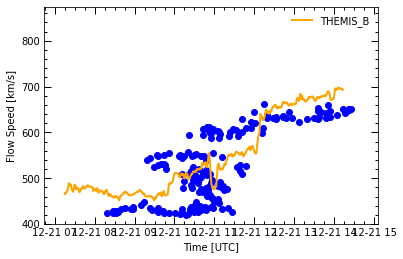

In [97]:
reload(mtr)
my_dtw1.events = 60000
my_dtw1.pred_earth()


['../cdf//omni/plsm/omni_hro_1min_20161201_v01.cdf']
[]
[]


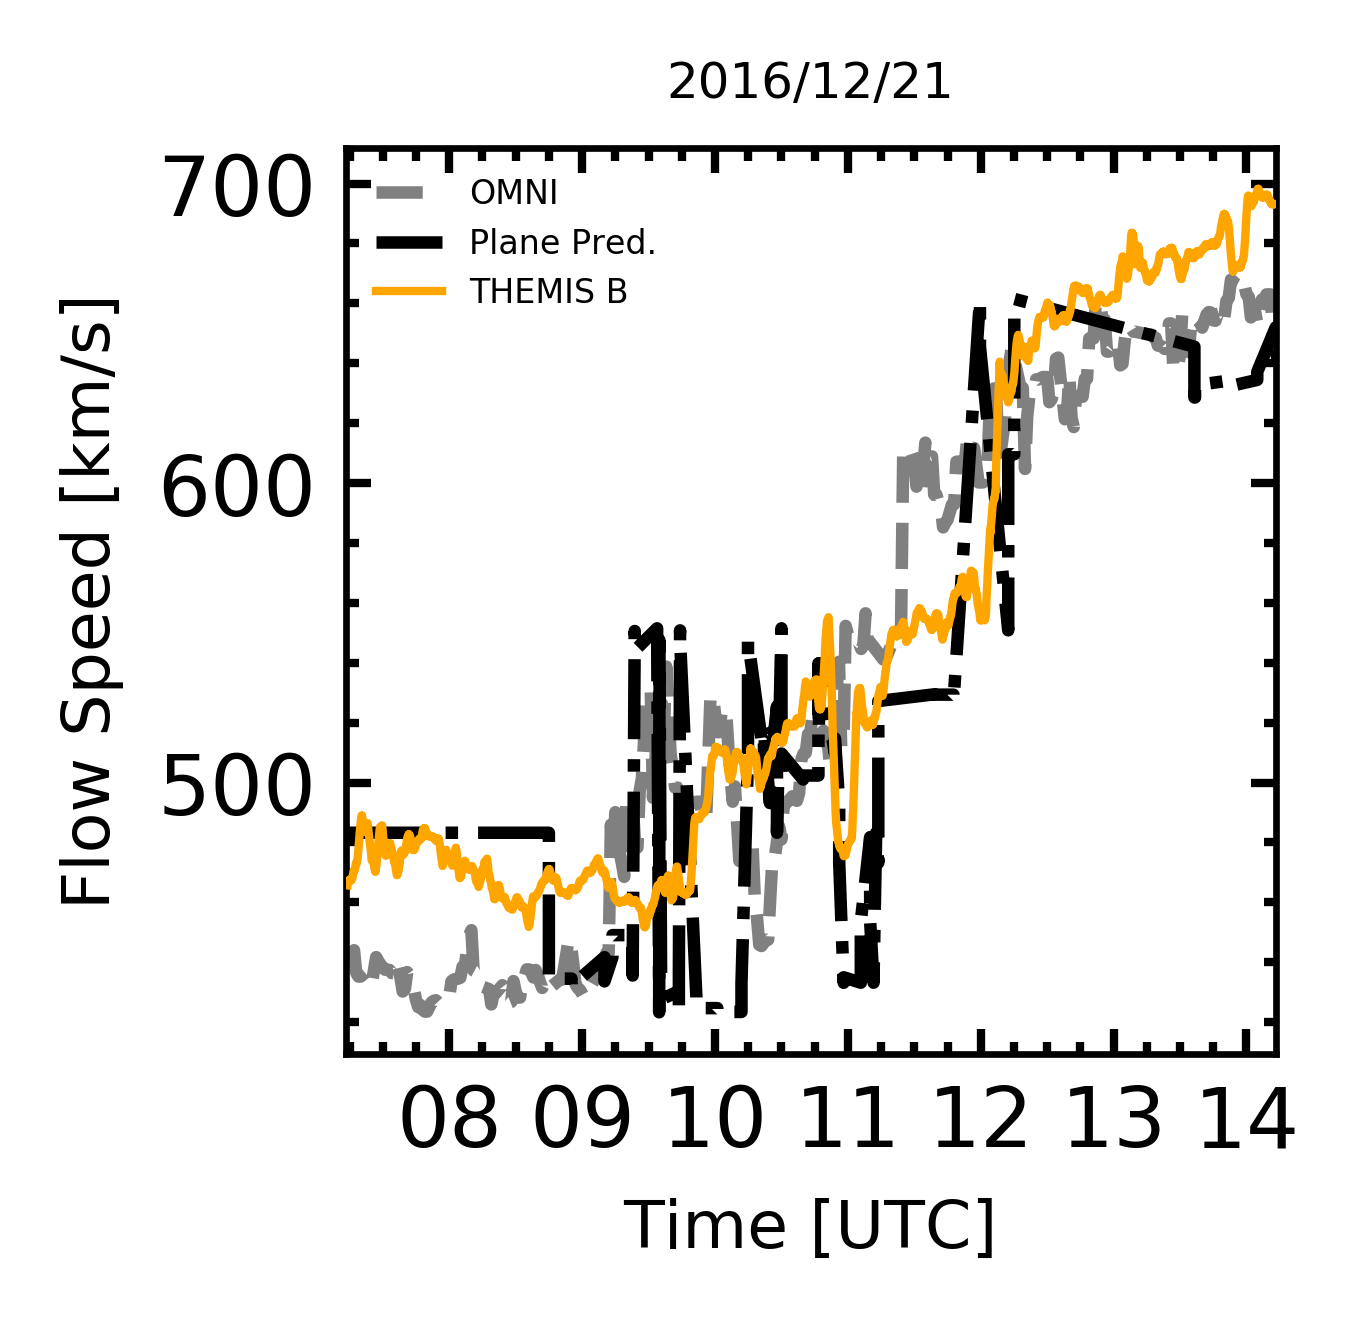

In [103]:
#Create plot comparing OMNI and plane solution
reload(mtr)
#print(dir(my_dtw1))
#print(pd.to_datetime(end_t1)-my_dtw1.t_mat.index[0] > pd.to_timedelta('45m'))
mtr.omni_plot(my_dtw1)
#mtr.movingaverage(my_dtw1.event_dict['THEMIS_B_velo'],5)-my_dtw1.event_dict['THEMIS_B_velo']


['../cdf//ace/plsm/ac_h0_swe_20161221_v10.cdf']
['../cdf//dscovr/plsm/dscovr_h1_fc_20161221_v06.cdf']
['../cdf//ace/mag/ac_h0_mfi_20161221_v06.cdf']
['../cdf//dscovr/mag/dscovr_h0_mag_20161221_v01.cdf']
['../cdf//ace/orb/ac_or_ssc_20160101_v01.cdf']
['../cdf//wind/plsm/wi_h1_swe_20161221_v01.cdf']
['../cdf//dscovr/orb/dscovr_orbit_pre_20161221_v07.cdf']
['../cdf//wind/mag/wi_h2_mfi_20161221_v05.cdf']
['../cdf//wind/orb/wi_or_pre_20161221_v02.cdf']


load_cdf_files.py:214: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:208: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:215: RuntimeWarning: invalid value encountered in sqrt
  Vth   = 1.E-3*np.sqrt(2.*kb/mp*cdf[keys[3]][...]) #convert Thermal Temp to Speed
model_time_range.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pls['time_dt_pls'] = pd.to_datetime(pls['Time'])
model_time_range.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

['../cdf//themis_b/plsm/thb_l2_mom_20161221_v01.cdf']
['../cdf//themis_b/plsm/thb_l2_mom_20161221_v01.cdf']
['../cdf//themis_b/orb/thb_or_ssc_20161201_v01.cdf']
###########################################
DSCOVR
WARPING TIME
Penalty = 0.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
ACE
WARPING TIME
Penalty = 0.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
SOHO
WARPING TIME
Penalty = 10.000
STOP WARPING TIME
REINDEXED
###########################################
###########################################
THEMIS_B
WARPING TIME
Penalty = 10.000
STOP WARPING TIME
REINDEXED
###########################################


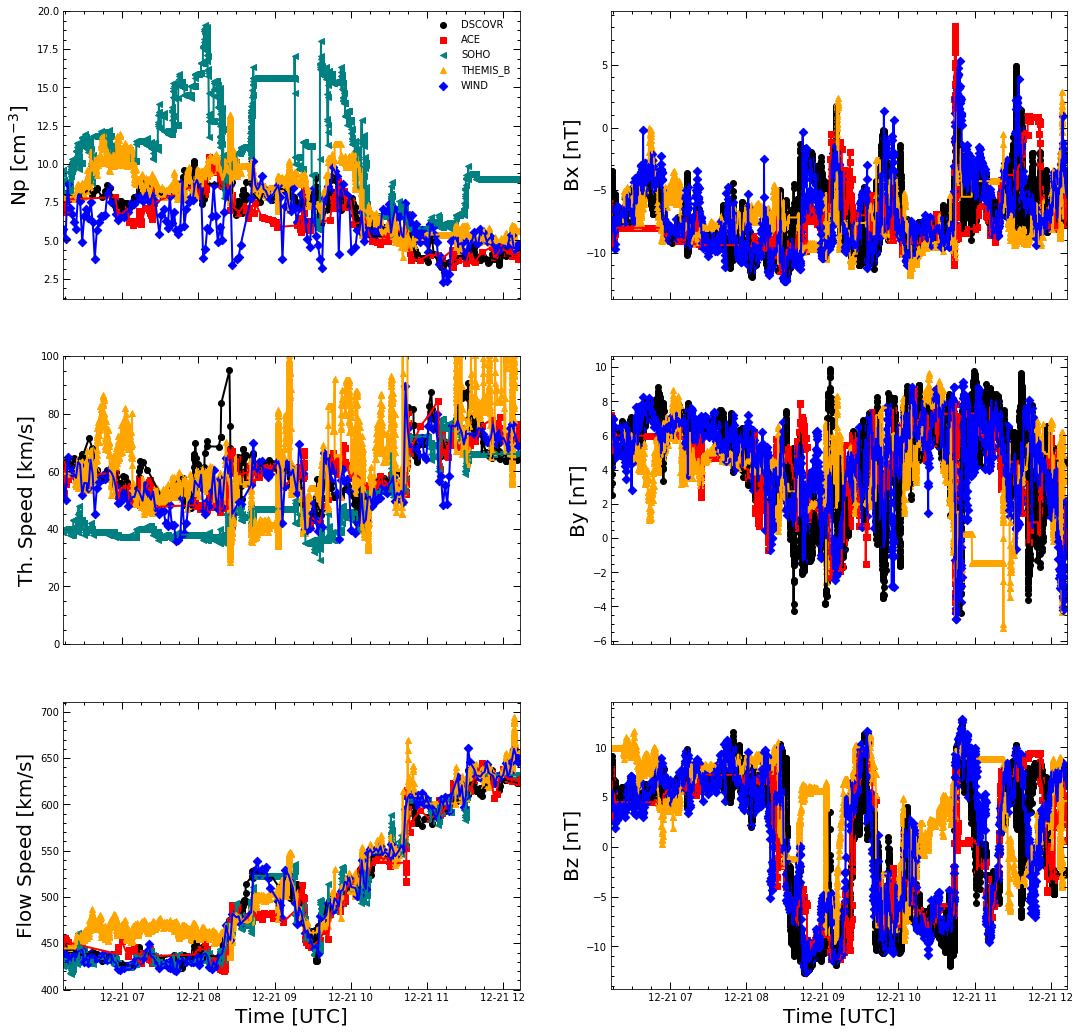

In [101]:
#now only doing the top events 2018/11/09 J. Prchlik
reload(mtr)
start_t2 = dfmt.format(twind1-2.5*window)
#For the 2016/12/21 event
end_t2 = dfmt.format(twind1+3.5*window)
my_dtw2 = mtr.dtw_plane(start_t2,end_t2,nproc=4,penalty=True,events=7,earth_craft=['THEMIS_B'],par=['Bt'])
my_dtw2.init_read()
#Do not use multi parm Single parameter solution works better
my_dtw2.dtw()

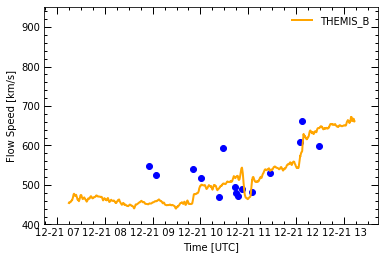

In [66]:
my_dtw2.events = 15
my_dtw2.pred_earth()

['../cdf//omni/plsm/omni_hro_1min_20161201_v01.cdf']
[]
[]


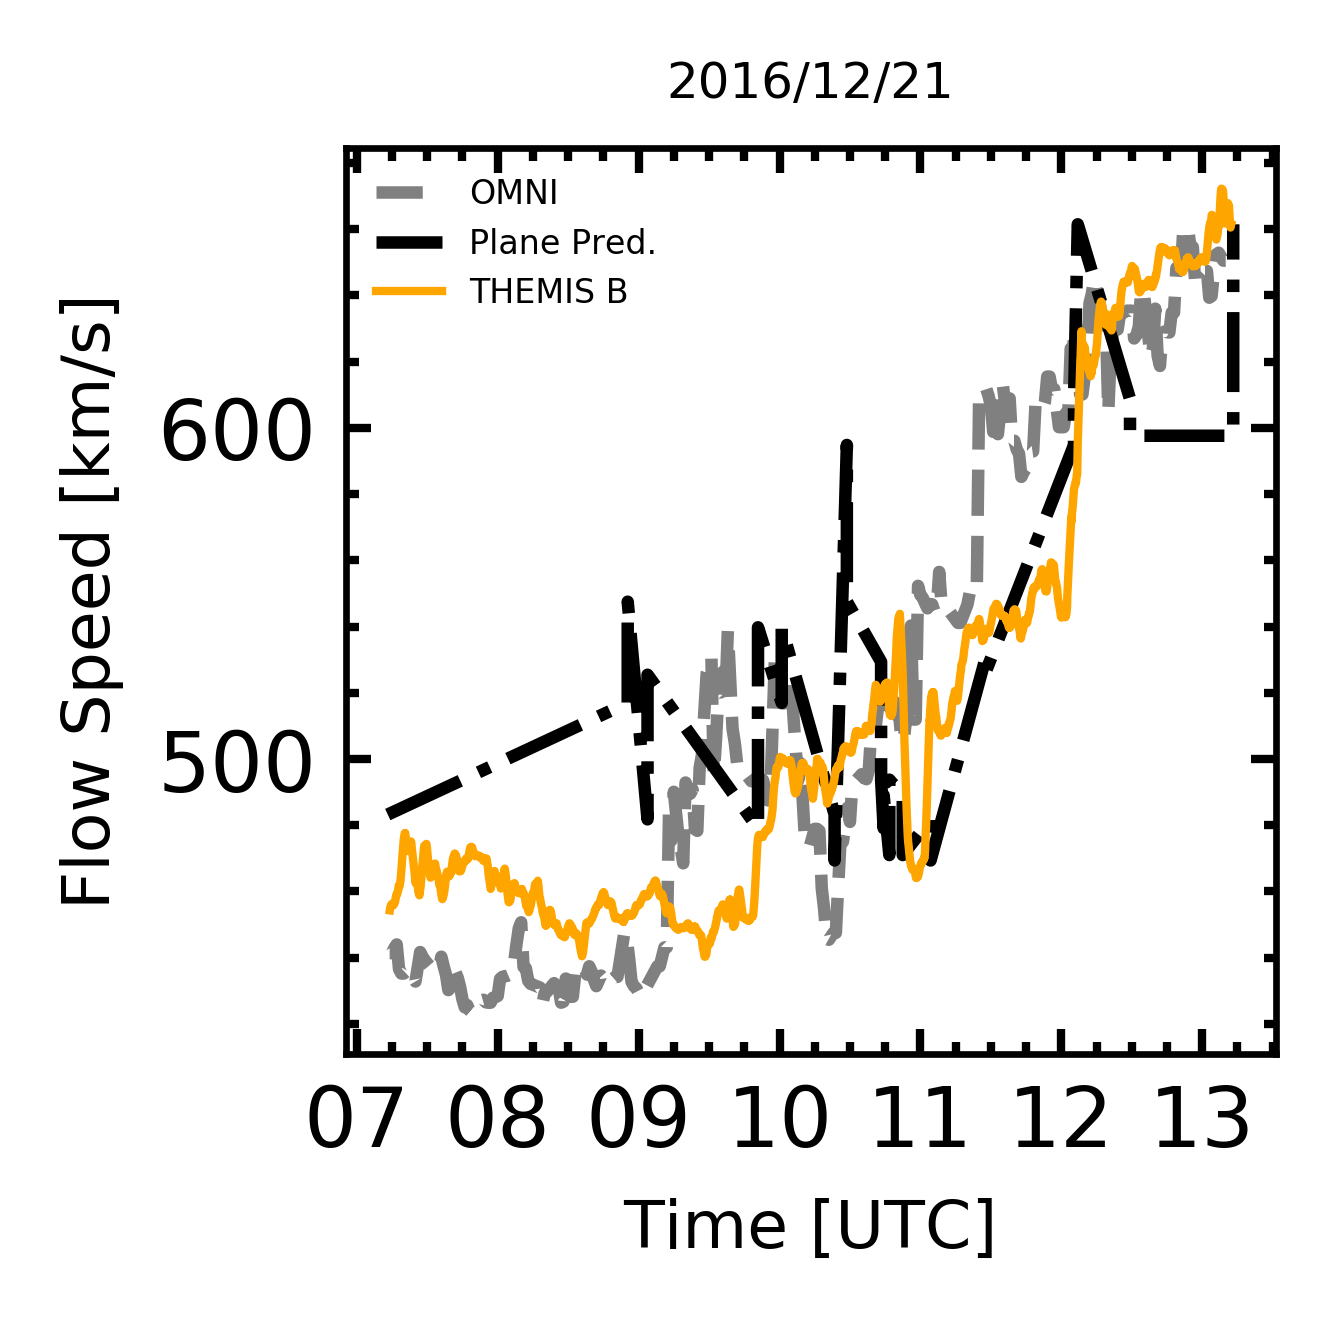

In [70]:
reload(mtr)
#Create plot comparing OMNI and plane solution
mtr.omni_plot(my_dtw2)

In [39]:
my_dtw2.plsm['DSCOVR'].columns

Index([u'Time_mag', u'Bx', u'By', u'Bz', u'DQF_mag', u'time_dt_mag', u'Bt',
       u'Time_pls', u'SPEED', u'Np', u'Vth', u'DQF_pls', u'time_dt_pls',
       u'Time', u'Time_orb', u'GSEx', u'GSEy', u'GSEz', u'time_dt_orb',
       u'craft'],
      dtype='object')

In [49]:
print(np.median(my_dtw2.plsm['DSCOVR'].time_dt_pls[my_dtw2.plsm['DSCOVR'].time_dt_pls.notnull()].diff())*1.e-9)
print(np.median(my_dtw2.plsm['DSCOVR'].time_dt_mag[my_dtw2.plsm['DSCOVR'].time_dt_mag.notnull()].diff())*1.e-9)

60 nanoseconds
1 nanoseconds


In [50]:
print(np.median(my_dtw2.plsm['Wind'].time_dt_pls[my_dtw2.plsm['Wind'].time_dt_pls.notnull()].diff())*1.e-9)
print(np.median(my_dtw2.plsm['Wind'].time_dt_mag[my_dtw2.plsm['Wind'].time_dt_mag.notnull()].diff())*1.e-9)

98 nanoseconds
8 nanoseconds


In [51]:

print(np.median(my_dtw2.plsm['ACE'].time_dt_pls[my_dtw2.plsm['ACE'].time_dt_pls.notnull()].diff())*1.e-9)
print(np.median(my_dtw2.plsm['ACE'].time_dt_mag[my_dtw2.plsm['ACE'].time_dt_mag.notnull()].diff())*1.e-9)


64 nanoseconds
16 nanoseconds


In [52]:

print(np.median(my_dtw2.plsm['THEMIS_B'].time_dt_pls[my_dtw2.plsm['THEMIS_B'].time_dt_pls.notnull()].diff())*1.e-9)
print(np.median(my_dtw2.plsm['THEMIS_B'].time_dt_mag[my_dtw2.plsm['THEMIS_B'].time_dt_mag.notnull()].diff())*1.e-9)

4 nanoseconds
4 nanoseconds


In [53]:

print(np.median(my_dtw2.plsm['SOHO'].time_dt_pls[my_dtw2.plsm['SOHO'].time_dt_pls.notnull()].diff())*1.e-9)

30 nanoseconds


In [105]:
#For the 2017/07/01 event
twind3 = pd.to_datetime('2017/07/01 16:55:03')
start_t3 = dfmt.format(twind3-2.5*window)
end_t3 = dfmt.format(twind3+4.5*window)
my_dtw3 = mtr.dtw_plane(start_t3,end_t3,nproc=4,penalty=True,events=7,earth_craft=['THEMIS_B'],par=['Bt'])
my_dtw3.init_read()


['../cdf//ace/plsm/ac_h0_swe_20170701_v10.cdf']
['../cdf//dscovr/plsm/dscovr_h1_fc_20170701_v06.cdf']
['../cdf//ace/mag/ac_h0_mfi_20170701_v06.cdf']
['../cdf//dscovr/mag/dscovr_h0_mag_20170701_v01.cdf']
['../cdf//ace/orb/ac_or_ssc_20170101_v01.cdf']
['../cdf//wind/plsm/wi_h1_swe_20170701_v01.cdf']
['../cdf//dscovr/orb/dscovr_orbit_pre_20170701_v05.cdf']
['../cdf//wind/mag/wi_h2_mfi_20170701_v04.cdf']
['../cdf//wind/orb/wi_or_pre_20170701_v02.cdf']


load_cdf_files.py:214: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:215: RuntimeWarning: invalid value encountered in sqrt
  Vth   = 1.E-3*np.sqrt(2.*kb/mp*cdf[keys[3]][...]) #convert Thermal Temp to Speed
model_time_range.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  mag['time_dt_mag'] = pd.to_datetime(mag['Time'])
model_time_range.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  mag['Bt'] = np.sqrt((mag.Bx**2+mag.By**2+mag.Bz**2).values.astype('float')

['../cdf//themis_b/plsm/thb_l2_mom_20170701_v01.cdf']
['../cdf//themis_b/plsm/thb_l2_mom_20170701_v01.cdf']
['../cdf//themis_b/orb/thb_or_ssc_20170701_v01.cdf']


###########################################
DSCOVR
WARPING TIME
Penalty = 0.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
ACE
WARPING TIME
Penalty = 0.200
STOP WARPING TIME
REINDEXED
###########################################
###########################################
SOHO
WARPING TIME
Penalty = 20.000
STOP WARPING TIME
REINDEXED
###########################################
###########################################
THEMIS_B
WARPING TIME
Penalty = 20.000
STOP WARPING TIME
REINDEXED
###########################################


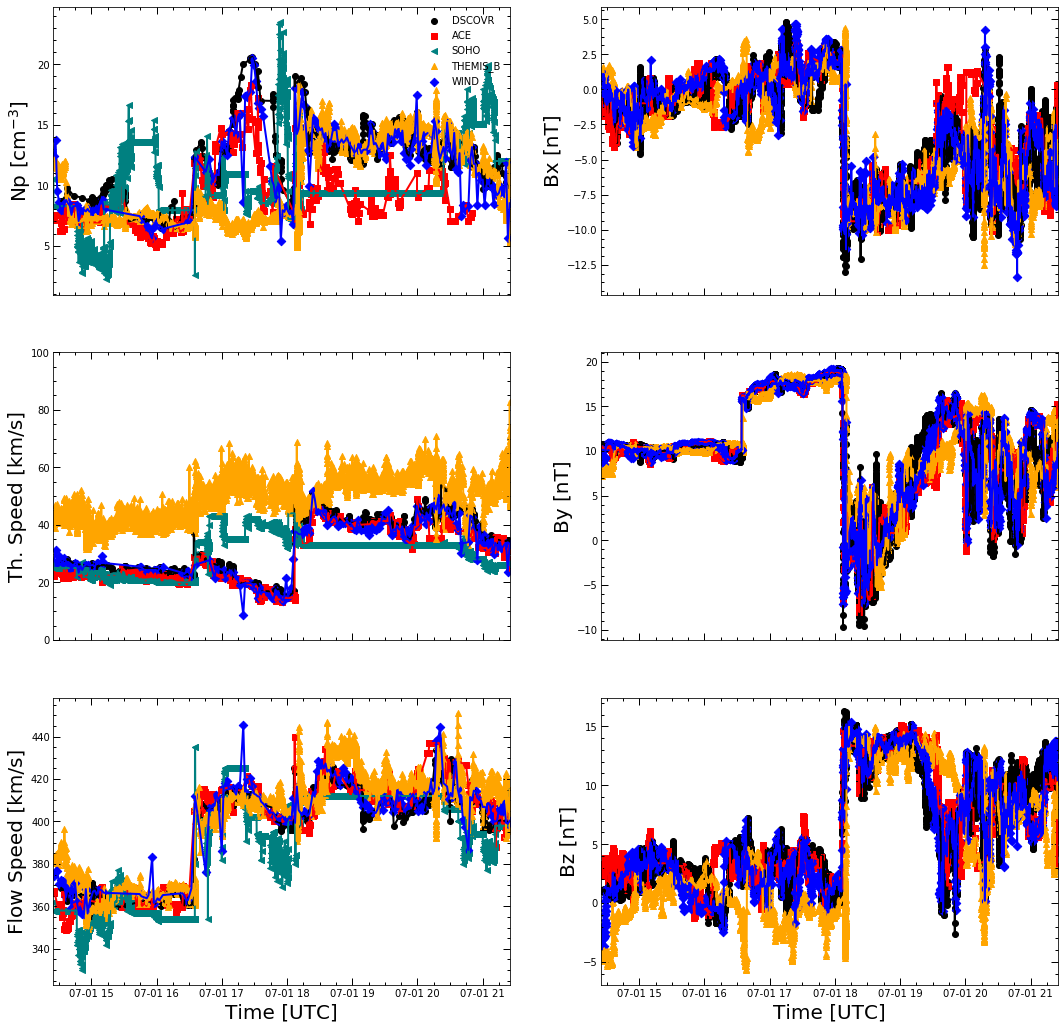

In [111]:
#Do not use multi parm Single parameter solution works better
my_dtw3.penalty = True
my_dtw3.speed_pen=20
my_dtw3.dtw()

17100


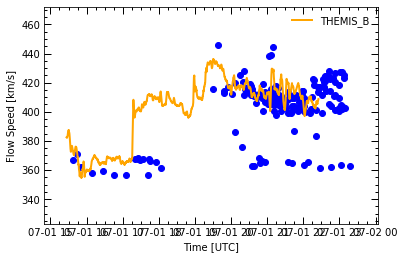

In [112]:
my_dtw3.events = 6*my_dtw2.plsm['Wind'].shape[0]
print(my_dtw3.events)
my_dtw3.pred_earth()

['../cdf//omni/plsm/omni_hro_1min_20170701_v01.cdf']
[]
[]


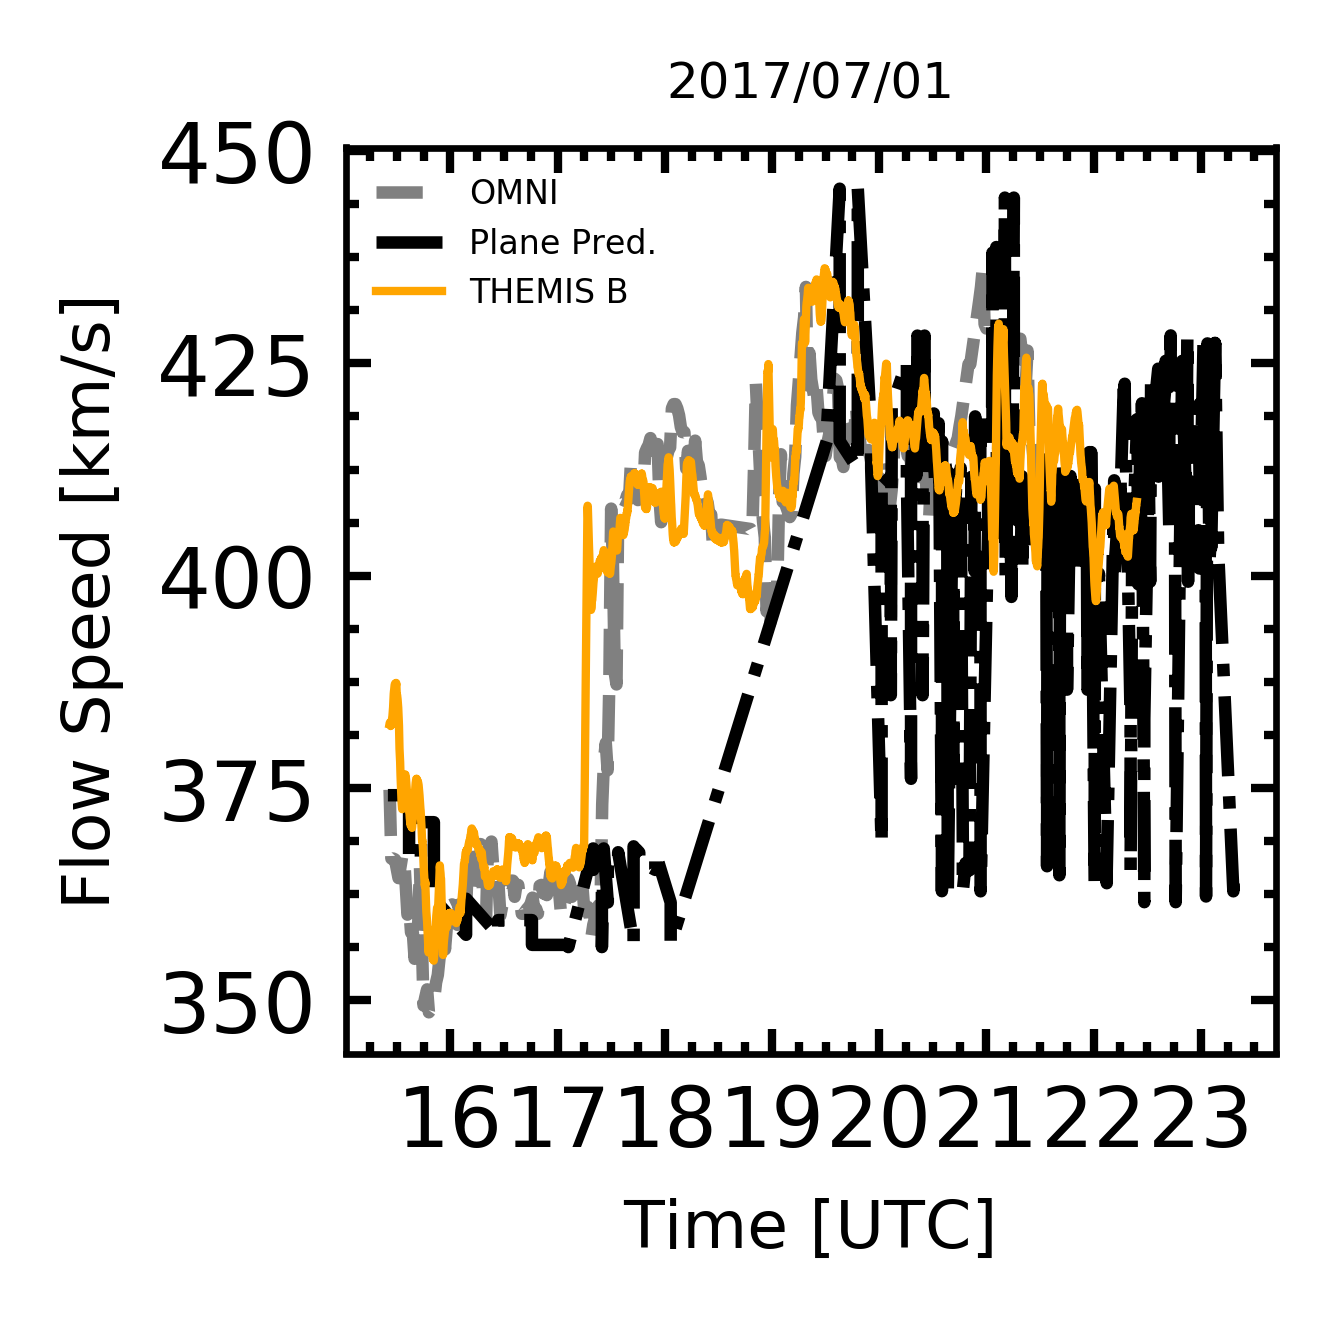

In [113]:
reload(mtr)
#Create plot comparing OMNI and plane solution
mtr.omni_plot(my_dtw3)

In [227]:
#For the 2017/07/01 event
reload(mtr)
twind4 = pd.to_datetime('2016/12/09 04:45:29')
start_t4 = dfmt.format(twind4-2.5*window)
end_t4 = dfmt.format(twind4+3.5*window)
my_dtw4 = mtr.dtw_plane(start_t4,end_t4,nproc=4,penalty=False,events=7,earth_craft=['THEMIS_B'],par=['Bt'])
my_dtw4.init_read()


['../cdf//ace/plsm/ac_h0_swe_20161209_v10.cdf']
['../cdf//dscovr/plsm/dscovr_h1_fc_20161209_v06.cdf']
['../cdf//ace/mag/ac_h0_mfi_20161209_v06.cdf']
['../cdf//dscovr/mag/dscovr_h0_mag_20161209_v01.cdf']
['../cdf//ace/orb/ac_or_ssc_20160101_v01.cdf']
['../cdf//wind/plsm/wi_h1_swe_20161209_v01.cdf']
['../cdf//dscovr/orb/dscovr_orbit_pre_20161209_v06.cdf']
['../cdf//wind/mag/wi_h2_mfi_20161209_v05.cdf']
['../cdf//wind/orb/wi_or_pre_20161209_v03.cdf']


load_cdf_files.py:208: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:214: RuntimeWarning: overflow encountered in square
  SPEED = np.sqrt(np.sum(cdf['V_GSE'][...]**2,axis=1))
load_cdf_files.py:215: RuntimeWarning: invalid value encountered in sqrt
  Vth   = 1.E-3*np.sqrt(2.*kb/mp*cdf[keys[3]][...]) #convert Thermal Temp to Speed
model_time_range.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  mag['time_dt_mag'] = pd.to_datetime(mag['Time'])
model_time_range.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

['../cdf//themis_b/plsm/thb_l2_mom_20161209_v01.cdf']
['../cdf//themis_b/plsm/thb_l2_mom_20161209_v01.cdf']
['../cdf//themis_b/orb/thb_or_ssc_20161201_v01.cdf']


###########################################
DSCOVR
WARPING TIME
Penalty = 0.001


TypeError: %d format: a number is required, not list

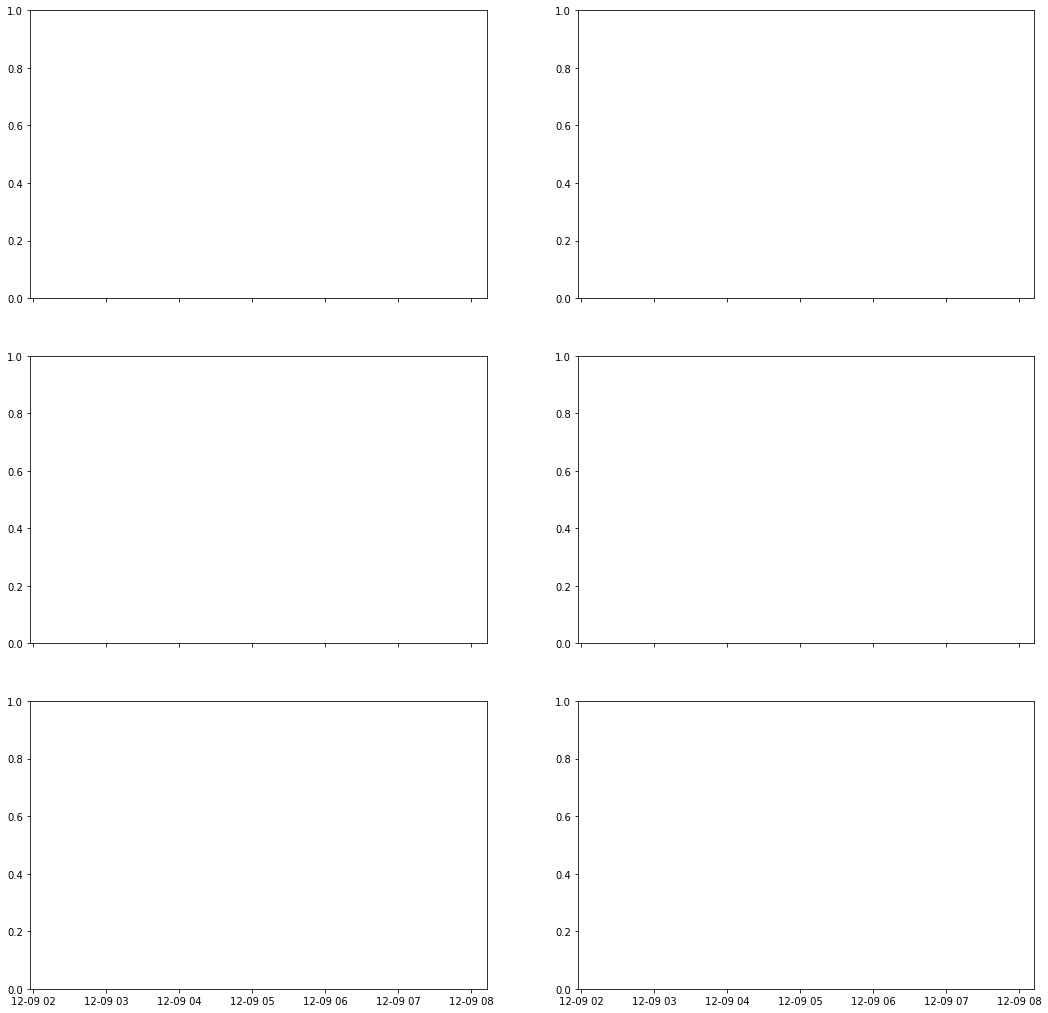

In [228]:
#Do not use multi parm Single parameter solution works better
my_dtw4.penalty = True
my_dtw4.speed_pen=50
my_dtw4.mag_pen = 0.001
my_dtw4.dtw()

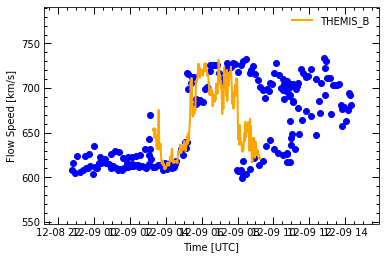

In [160]:
my_dtw4.events = 50000
my_dtw4.pred_earth()

['../cdf//omni/plsm/omni_hro_1min_20161201_v01.cdf']
[]
[]


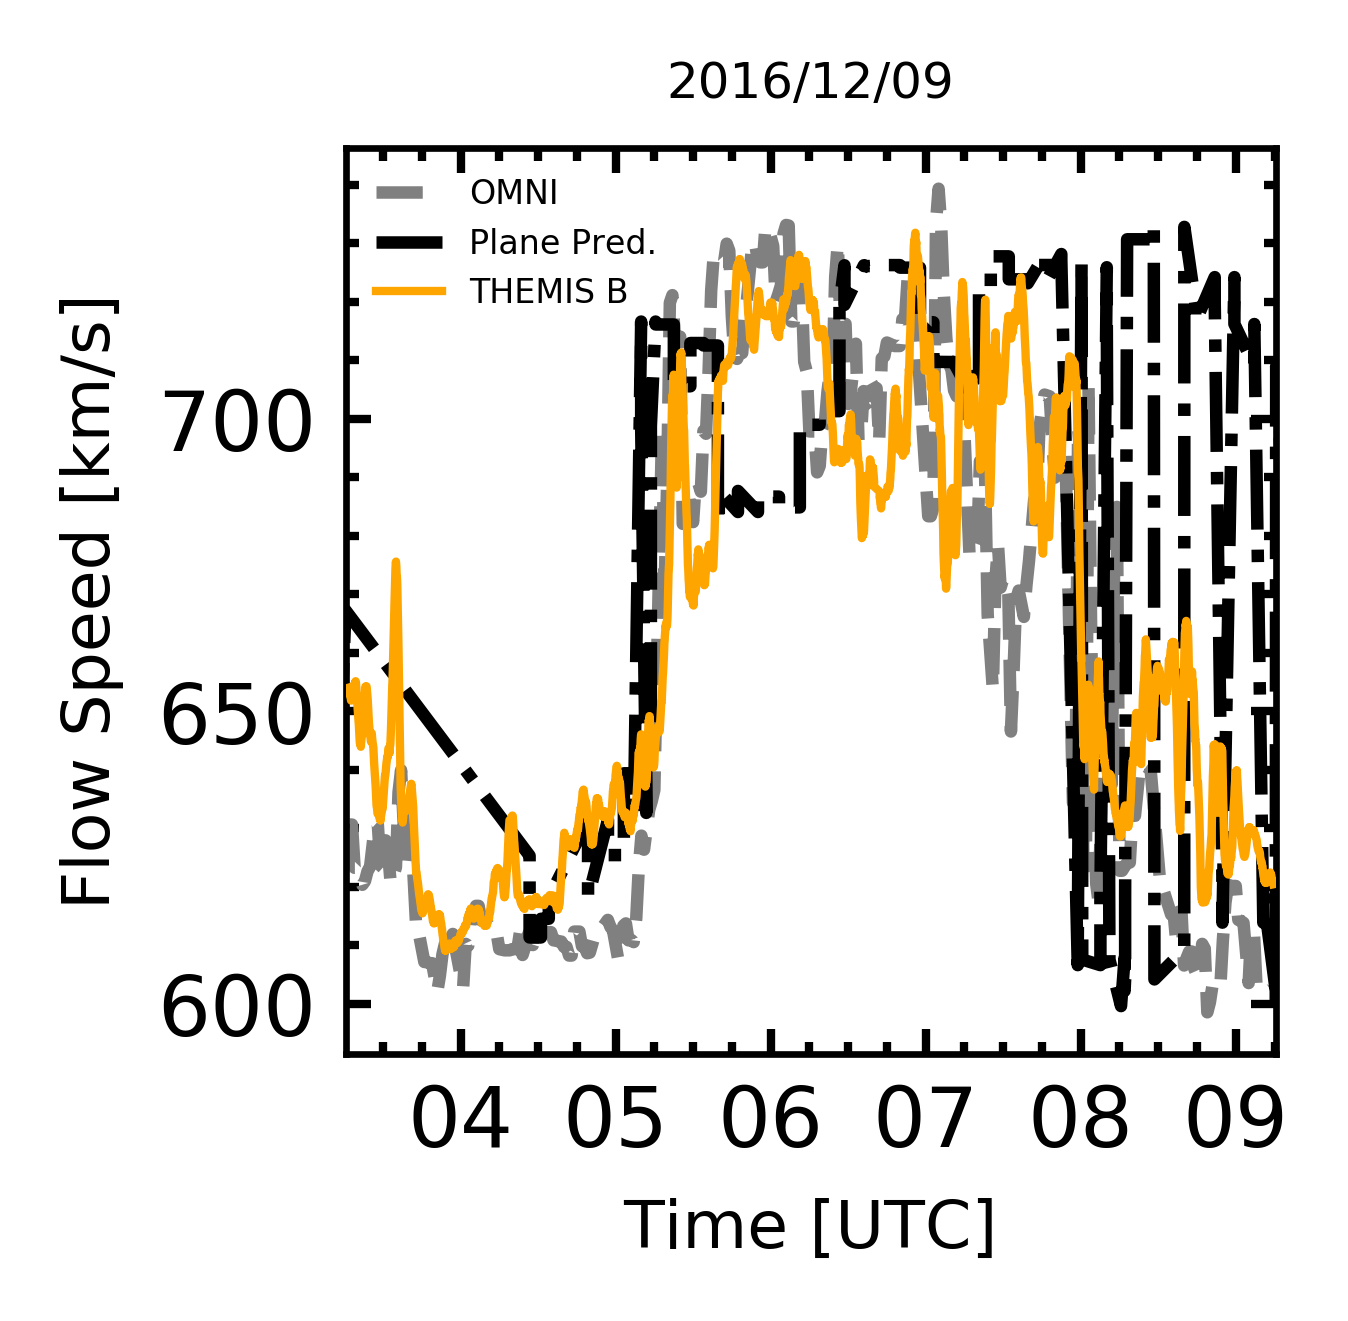

In [161]:
reload(mtr)
#Create plot comparing OMNI and plane solution
mtr.omni_plot(my_dtw4)

In [225]:
del md
import multi_dtw as md

In [235]:

float(np.median(np.diff(my_dtw4.plsm['Wind'].index)*1.e-9))

8.0

In [226]:
x1 = np.array(my_dtw4.plsm['Wind'].SPEED.ffill().bfill().values,dtype=np.double)
x2 = np.array(my_dtw4.plsm['SOHO'].SPEED.ffill().bfill().values,dtype=np.double)
x1 = np.linspace(0,50,100)
x2 = np.linspace(0,50,200)
sam_1 = 4000
sam_2 = 2000
inp_1 = np.linspace(0,40,sam_1)
inp_2 = np.linspace(0,40,sam_2)
md.dtw_path_single(inp_1,inp_2,50,50.0,0)

TypeError: %d format: a number is required, not list

In [184]:
my_dtw4.plsm['Wind'].SPEED.ffill().bfill().values.astype('double')

array([ 667.21856689,  667.21856689,  667.21856689, ...,  599.56170654,
        599.56170654,  599.56170654])